In [66]:
# pip install jupyter ipympl

In [1]:
import numpy as np
import random
import sklearn.model_selection as model_selection
import scipy.io.arff as arff
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt

# Load MINST data

In [22]:
arffData = arff.loadarff("../../datasets/mnist_784.arff")

In [23]:
pdata = pd.DataFrame(arffData[0])

In [24]:
data, target = pdata[pdata.columns[:-1]], pdata[pdata.columns[-1]]

In [25]:
(rest_data, x_test, rest_target, y_test) = model_selection.train_test_split(data,target, test_size=10000,shuffle=True, random_state=24, stratify=target)
(x_train, x_validate, y_train, y_validate) = model_selection.train_test_split(rest_data,rest_target, test_size=10000,shuffle=True, random_state=24, stratify=rest_target)

In [26]:
def gety(y):
    z = np.zeros((10,1))
    z[int(y)] = 1.0
    return z

In [27]:
training_set = [(x.reshape(784,1), gety(y)) for x,y in zip(x_train.values, y_train)]
validation_set = [(x.reshape(784,1), gety(y)) for x,y in zip(x_validate.values, y_validate)]
test_set = [(x.reshape(784,1), gety(y)) for x,y in zip(x_test.values, y_test)]

# Network defination

In [59]:
class Network(object):
    def __init__(self, sizes):
        self.sizes = sizes
        self.weights = [np.random.randn(x,y) for x,y in zip(sizes[1:], sizes[:-1])]
        self.biases = [np.random.randn(x,1) for x in sizes[1:]]

    def feedforward(self, a):
        for (w, b) in zip(self.weights, self.biases):
            a = sigmoid(w @ a + b)

        return a

    def evaluate(self, validation_set):
        cost = 0
        correct = 0
        m = len(validation_set)
        for x,y in validation_set:
            a = self.feedforward(x)
            d1 = np.argmax(y)
            d2 = np.argmax(a)
            cost += (d1 - d2)**2
            if d1 == d2:
               correct += 1 
        loss = cost / (2*m)
        percent = correct * 100 / m
        
        return loss, percent

    def SGD(self, training_set, epochs, mini_batch_size, eta, validation_set = None, lossAxis=None, percentAxis=None):
        n = len(training_set)
        graph_epochs = []
        graph_loss = []
        graph_percent = []

        for epoch in range(epochs):
            np.random.shuffle(training_set)
            
            mini_batches = [training_set[k: k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            self.mini_batch_update(mini_batches, eta)

            if validation_set != None:
                loss, percent = self.evaluate(validation_set)

                graph_epochs.append(epoch+1)
                graph_loss.append(loss)
                graph_percent.append(percent)
                
                if lossAxis:
                    pltsin(lossAxis, graph_epochs, graph_loss)
                if percentAxis:
                    pltsin(percentAxis, graph_epochs, graph_percent)
                
                print("Epoch {0} completed. Loss: {1}".format(epoch+1, loss))
            else:
                print("Epoch {0} completed.".format(epoch+1))

    def mini_batch_update(self, mini_batches, eta):
        for mini_batch in mini_batches:
            nabla_w = [np.zeros(w.shape) for w in self.weights]
            nabla_b = [np.zeros(b.shape) for b in self.biases]
            
            for x, y in mini_batch:
                a = x
                ass = [a]
                zss = []
                delta_nabla_w = [np.zeros(w.shape) for w in self.weights]
                delta_nabla_b = [np.zeros(b.shape) for b in self.biases]

                for w,b in zip(self.weights, self.biases):
                    z = w @ a + b
                    zss.append(z)

                    a = sigmoid(z)
                    ass.append(a)

                # backprop
                error = None
                for l in range(-1, -len(self.sizes), -1):
                    if l == -1:
                        error = (ass[l] - y) * sigmoid_prime(zss[l])
                    else:
                        error = (self.weights[l+1].transpose() @ error) * sigmoid_prime(zss[l])

                    delta_nabla_w[l] = error @ ass[l-1].transpose()
                    delta_nabla_b[l] = error

                nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
                nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]

            # average out nablas, multiply them by learning rate and adjust weights and biases
            m = len(mini_batch)
            self.weights = [w + nw * -eta/m for w, nw in zip(self.weights, nabla_w)]
            self.biases = [b + nb * -eta/m for b, nb in zip(self.biases, nabla_b)]

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

    

# Run

In [60]:
def pltsin(ax, x, y, colors=['b']):
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(y)
    else:
        for color in colors:
            ax.plot(x, y, color)
    fig.canvas.draw()

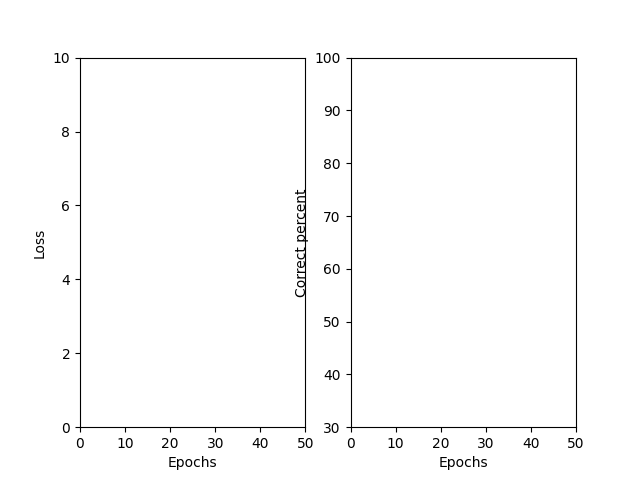

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_xlim(0,50)
ax1.set_ylim(0,10)

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Correct percent')
ax2.set_xlim(0,50)
ax2.set_ylim(30,100)

plt.show()

In [65]:
net = Network([784, 30, 10])
net.SGD(training_set, 30, 10, .05, validation_set = validation_set, lossAxis=ax1, percentAxis=ax2)

/tmp/ipykernel_19996/3295490525.py:96: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Epoch 1 completed. Loss: 5.48425
Epoch 2 completed. Loss: 4.4934
Epoch 3 completed. Loss: 4.1487
Epoch 4 completed. Loss: 3.51615
Epoch 5 completed. Loss: 3.1848
Epoch 6 completed. Loss: 3.00515
Epoch 7 completed. Loss: 2.67245
Epoch 8 completed. Loss: 2.64175
Epoch 9 completed. Loss: 2.48205
Epoch 10 completed. Loss: 2.4758
Epoch 11 completed. Loss: 2.3257
Epoch 12 completed. Loss: 2.2196
Epoch 13 completed. Loss: 2.0286
Epoch 14 completed. Loss: 1.9947
Epoch 15 completed. Loss: 1.6544
Epoch 16 completed. Loss: 1.667
Epoch 17 completed. Loss: 1.59965
Epoch 18 completed. Loss: 1.61835
Epoch 19 completed. Loss: 1.5029
Epoch 20 completed. Loss: 1.46325
Epoch 21 completed. Loss: 1.43805
Epoch 22 completed. Loss: 1.48165
Epoch 23 completed. Loss: 1.48005
Epoch 24 completed. Loss: 1.5324
Epoch 25 completed. Loss: 1.4667
Epoch 26 completed. Loss: 1.35785
Epoch 27 completed. Loss: 1.32905
Epoch 28 completed. Loss: 1.3755
Epoch 29 completed. Loss: 1.4965
Epoch 30 completed. Loss: 1.4679
